In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
positions  = pd.read_csv('xt_pos_df.csv',index_col=0)

In [52]:
position_table = positions.T.copy()
position_table['ccy'] = 'USD' + position_table.index + ' Curncy'
position_table.set_index('ccy', inplace=True)
position_table.columns = pd.to_datetime(position_table.columns)

In [53]:
df = pd.read_excel('Monthly Data.xlsx', sheet_name=0, index_col = 0).iloc[2:,:]
df_1mpoints = pd.read_excel('Monthly Data.xlsx', sheet_name=1, index_col = 0).iloc[2:,:]
df = df.astype(float)
df_1mpoints = df_1mpoints.astype(float)
return_table = np.log(df/df.shift(-1)).dropna()

In [54]:
# Constrct 1m points
points_table = pd.DataFrame()
for i in range(len(df_1mpoints)):
    zz  = df.iloc[i:i+1,:].T.reset_index().iloc[:,1:] / df_1mpoints.iloc[i:i+1,:].T.reset_index().iloc[:,1:] - 1
    points_table = points_table.append(zz.T)
points_table.columns = df.columns

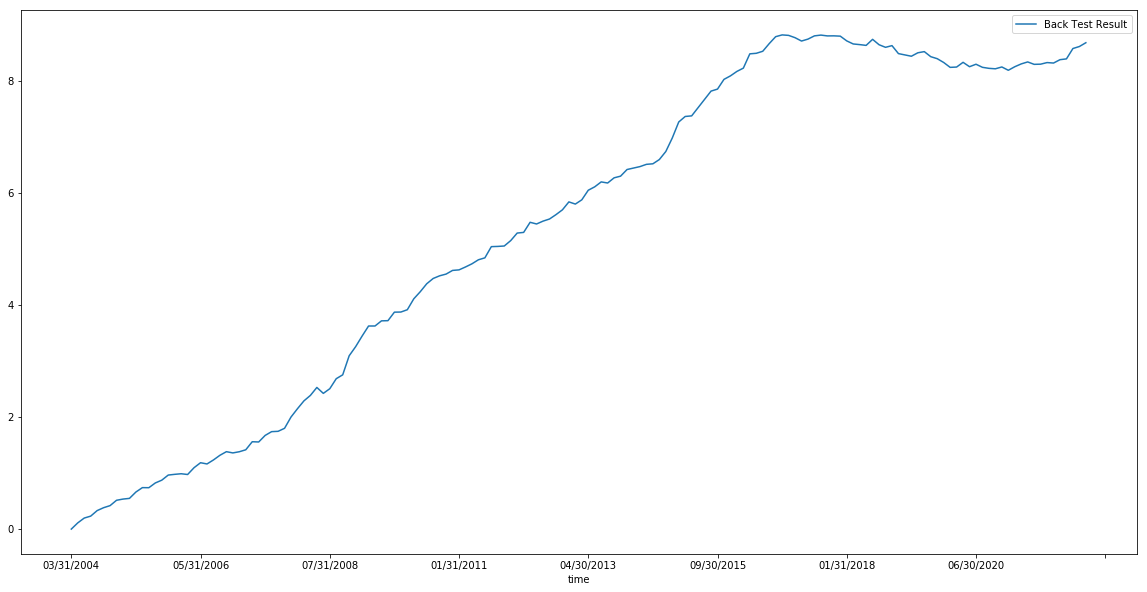

In [55]:
number_of_pairs = 3

import PnL_Calc
# Compound Return will need the fifth parameter in PnL function as 1, default method is simple return if there is no the fifth parameter
# Sixth parameter: default = 0 (long short ccy); = 1 (long ccy only); = 2 (short ccy only)
Mothly_return, Accum_monthly_return, PnL_vol, Sharp_ratio, ccy_pairs_table, Max_Drawdown, Annulized_Return = PnL_Calc.PnL(position_table, return_table, points_table, number_of_pairs, 0, 0)

Accum_return_df = pd.DataFrame(Accum_monthly_return.sum(),columns = ['Back Test Result'])
Accum_return_df['time'] = Accum_monthly_return.columns.strftime('%m/%d/%Y')
Accum_return_df.set_index('time').plot(figsize=(20, 10))
plt.show()

In [56]:
# Return breakdown by ccy contribution
final_return = Accum_monthly_return.iloc[:,-1:].dropna()
final_return.columns = ['Final Return']
final_return.sort_values(by = 'Final Return',ascending = False).style.background_gradient(axis=0)  

,Final Return
ccy,
USDRUB Curncy,1.367137
USDBRL Curncy,1.331242
USDPLN Curncy,1.274488
USDJPY Curncy,0.937766
USDZAR Curncy,0.876319
USDCZK Curncy,0.690886
USDCOP Curncy,0.392665
USDEUR Curncy,0.345879
USDSEK Curncy,0.344925
